# INFANT MORTALITY AND PREVENTION - Capstone Project

##                                                              Context
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.

The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

### What is infant mortality?
Infant mortality is a death of an infant during birth or before the age of 5 due to various reasons.

##                                                           Objectives

 - Infant mortality involves the in-depth analysis of data related to the unfortunate deaths of children under the age of five. 
    
 - By investigating the causes, trends, and geographical variations in under-five mortality, this analysis aims to derive valuable insights that can inform policies and interventions to reduce child mortality rates and improve child health worldwide.
    
 - Develop a multiclass classification model for CTG features to accurately categorize fetal health into Normal, Suspect, and Pathological states, aiming to aid healthcare professionals in reducing child and maternal mortality.

Importing Libraries

In [13]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import random
import seaborn as sns
import numpy as np
import pandas as pd

### About Dataset
 - This dataset is downloaded from WHO website. https://platform.who.int/data/maternal-newborn-child-adolescent-ageing/indicator-explorer-new/mca/number-of-under-five-deaths---by-cause
 - It contains number of under-5 deaths for all the countries over a period of 19 years(2000-2019) due to 14 various reasons.
 - Dataset has 54,320 which has been used for analysis and insights.
 - Dataset has 11 columns with Year, Country, Region, Income group and Number of Deaths as the important features.

In [15]:
#Downloading the CSV from WHO website and upload it via Jupyter's GUI

data_filename = 'Under 5 mortality rate.csv'
df = pd.read_csv(data_filename)
df.head()

,Indicator,Year,Country,Global,WHO region,World bank income group,Age group,Cause,Datasource short,Datasource long,Value Numeric,Value String
0,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Acute lower respiratory infections,MCEE,Maternal and Child Epidemiology Estimation (MCEE),27967.300,27967.300
1,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Diarrhoeal diseases,MCEE,Maternal and Child Epidemiology Estimation (MCEE),15444.050,15444.050
2,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Measles,MCEE,Maternal and Child Epidemiology Estimation (MCEE),10765.980,10765.980
3,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Prematurity,MCEE,Maternal and Child Epidemiology Estimation (MCEE),20721.450,20721.450
4,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Injuries,MCEE,Maternal and Child Epidemiology Estimation (MCEE),3174.209,3174.209


Checking the structure of the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Indicator                54320 non-null  object 
 1   Year                     54320 non-null  int64  
 2   Country                  54320 non-null  object 
 3   Global                   0 non-null      float64
 4   WHO region               54320 non-null  object 
 5   World bank income group  53480 non-null  object 
 6   Age group                54320 non-null  object 
 7   Cause                    54320 non-null  object 
 8   Datasource short         54320 non-null  object 
 9   Datasource long          54320 non-null  object 
 10  Value Numeric            54320 non-null  float64
 11  Value String             54320 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 5.0+ MB


In [17]:
df.shape

(54320, 12)

Renaming the columns for clarity and easy usage

In [18]:

#Change the column names to avoid syntax errors

dict = {'WHO region': 'Region',
        'World bank income group': 'Income_group',
        'Age group': 'Age_group',
        'Datasource short': 'Datasource_short',
       'Datasource long': 'Datasource_long',
       'Value Numeric': 'Value_Numeric'}

df.rename(columns=dict,
              inplace=True)

In [19]:
df.head()

,Indicator,Year,Country,Global,Region,Income_group,Age_group,Cause,Datasource_short,Datasource_long,Value_Numeric,Value String
0,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Acute lower respiratory infections,MCEE,Maternal and Child Epidemiology Estimation (MCEE),27967.300,27967.300
1,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Diarrhoeal diseases,MCEE,Maternal and Child Epidemiology Estimation (MCEE),15444.050,15444.050
2,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Measles,MCEE,Maternal and Child Epidemiology Estimation (MCEE),10765.980,10765.980
3,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Prematurity,MCEE,Maternal and Child Epidemiology Estimation (MCEE),20721.450,20721.450
4,Number of under-five deaths - by cause,2000,Afghanistan,NaN,Eastern Mediterranean,Low income,0-4,Injuries,MCEE,Maternal and Child Epidemiology Estimation (MCEE),3174.209,3174.209


Having a look at the summary statistics. This summary provides a quick overview of the statistical properties of the data, which can be helpful for understanding the distribution and central tendencies of the numerical variables in your dataset.


In [20]:
df.describe(include='all')

,Indicator,Year,Country,Global,Region,Income_group,Age_group,Cause,Datasource_short,Datasource_long,Value_Numeric,Value String
count,54320,54320.000000,54320,0.0,54320,53480,54320,54320,54320,54320,54320.000000,54320.000000
unique,1,NaN,194,NaN,6,4,1,14,1,1,NaN,NaN
top,Number of under-five deaths - by cause,NaN,Afghanistan,NaN,Europe,High income,0-4,Acute lower respiratory infections,MCEE,Maternal and Child Epidemiology Estimation (MCEE),NaN,NaN
freq,54320,NaN,280,NaN,14840,16520,54320,3880,54320,54320,NaN,NaN
mean,NaN,2009.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2673.194254,2673.194254
std,NaN,5.766334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15163.128617,15163.128617
min,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,2004.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.387371,1.387371
50%,NaN,2009.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.981430,53.981430
75%,NaN,2014.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,842.224075,842.224075


Counting number of records for each region. These counts provide information about the distribution of countries across different regions in the dataset.

In [21]:
df['Region'].value_counts()

Europe                   14840
Africa                   13160
Americas                  9800
Western Pacific           7560
Eastern Mediterranean     5880
South-East Asia           3080
Name: Region, dtype: int64

Let us see what are the different causes of under-five deaths included in the dataset.

In [22]:
for value in df['Cause'].unique():
    print(value)

Acute lower respiratory infections
Diarrhoeal diseases
Measles
Prematurity
Injuries
Malaria
Meningitis/encephalitis
Congenital anomalies
Other Group 1 and Other noncommunicable (neonatal and under-5 only)
Sepsis and other infectious conditions of the newborn
Tuberculosis
HIV/AIDS
Birth asphyxia and birth trauma
Tetanus


For how many countres is the data collected for

In [23]:
df['Country'].nunique()

194

Checking for any null values

In [24]:
df.isna().sum()

Indicator               0
Year                    0
Country                 0
Global              54320
Region                  0
Income_group          840
Age_group               0
Cause                   0
Datasource_short        0
Datasource_long         0
Value_Numeric           0
Value String            0
dtype: int64

Dropping the 'Global' column as it has all null values. Dropping the 'Value String' column as it has the same data as 'Value_Numeric' but in string format which is not required in this context.

In [25]:
df.drop(['Global'],axis=1, inplace = True)
df.drop(['Value String'],axis=1, inplace = True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54320 entries, 0 to 54319
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Indicator         54320 non-null  object 
 1   Year              54320 non-null  int64  
 2   Country           54320 non-null  object 
 3   Region            54320 non-null  object 
 4   Income_group      53480 non-null  object 
 5   Age_group         54320 non-null  object 
 6   Cause             54320 non-null  object 
 7   Datasource_short  54320 non-null  object 
 8   Datasource_long   54320 non-null  object 
 9   Value_Numeric     54320 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 4.1+ MB


Checking the countries for which the Income group is null.

In [27]:
df[df['Income_group'].isna()]['Country'].value_counts()

Cook Islands                          280
Niue                                  280
Venezuela (Bolivarian Republic of)    280
Name: Country, dtype: int64

## Exploratory Data Analysis (EDA):

Calculating the total number of deaths for each reason and the numbers changed over the period of 19 years

In [28]:
df_cause_total=df.groupby(['Cause','Year']).sum()
df_cause_total

Value_Numeric
Cause                              Year               
Acute lower respiratory infections 2000   1.645627e+06
                                   2001   1.571197e+06
                                   2002   1.535527e+06
                                   2003   1.482123e+06
                                   2004   1.429394e+06
...                                                ...
Tuberculosis                       2015   1.502628e+05
                                   2016   1.469960e+05
                                   2017   1.438010e+05
                                   2018   1.386076e+05
                                   2019   1.344777e+05

[280 rows x 1 columns]

Truncating the text of one Cause as it is too long and may distort the visualisaztions

In [29]:

df['Cause'] = df['Cause'].replace('Other Group 1 and Other noncommunicable (neonatal and under-5 only)', 'Other Group 1 and Other noncommunicable')


### Time series Analysis:

Defining a function to plot time series on Number of Deaths for different features

In [30]:
def plot_time_series_column_over_deaths(column):
    df_total = df.groupby([column, 'Year']).sum()

    # Reset the index to make 'Year' a regular column
    df_total_reset = df_total.reset_index()

    regions = df_total_reset[column].unique()

    fig, ax = plt.subplots(figsize=(10, 8) ) # Create a figure and axis

    # Plot lines for each column value using a loop
    for col, group in df_total_reset.groupby(column):
        plt.plot(group['Year'], group['Value_Numeric'], label=col)

        # Annotate the lines with region names
        last_value = group['Value_Numeric'].iloc[-1]
        plt.annotate(col, (group['Year'].iloc[-1], last_value))

    plt.xlabel('Year')
    plt.ylabel('Number of Deaths')

    # Move the legend outside of the graph area
    #plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.title('Line Plot of total deaths Over Years by ' + column)
    plt.grid(True)  # Optional: Add grid lines

    # Format the x-axis ticks with no decimals
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: int(x)))

    # Set y-axis tick labels with full values
    ax.set_yticklabels(["{:.0f}".format(label) for label in ax.get_yticks()])

    plt.show()

Time series of number of Deaths for each region.

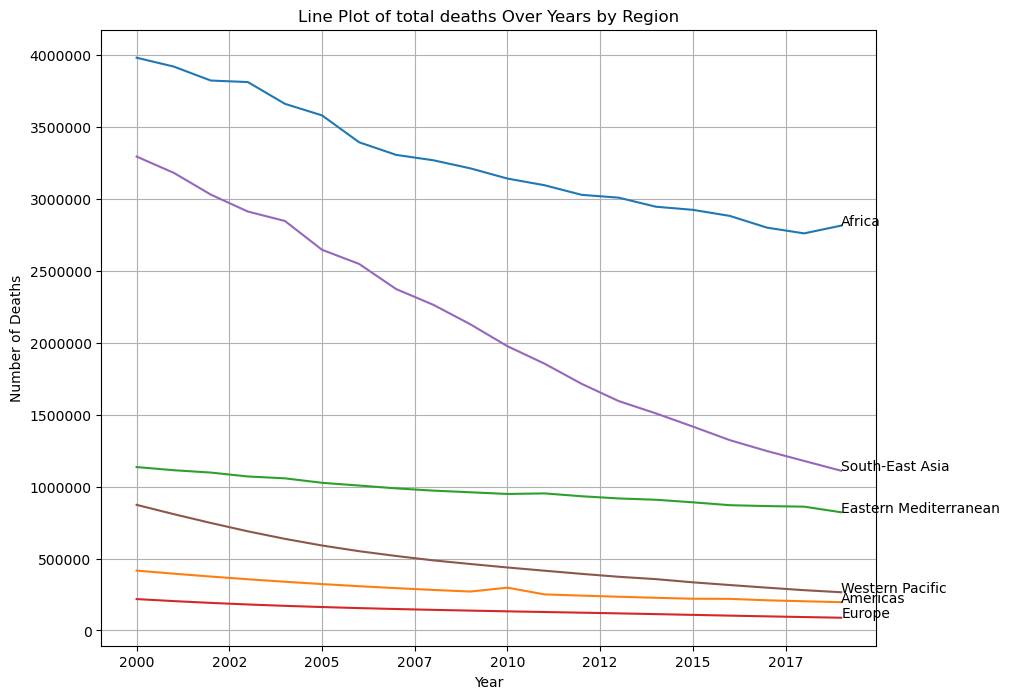

In [31]:
plot_time_series_column_over_deaths('Region')

 - It is evident that Significant work has been done in Africa nd South-East Asia to reduce Infant mortality. However, there is more scope for improvement in African counties where as in South-East Asia there is a consistent fall in the number of deaths.
 
 - Eastern Mediterranean and Western Pacific have relatively less number of deaths but, a slow progress is seen.
 
  - Americas and Europe have very low numbers from where policies can be inspired and implemented in the rest the world for infant mortality.

Time series of number of Deaths for each cause.

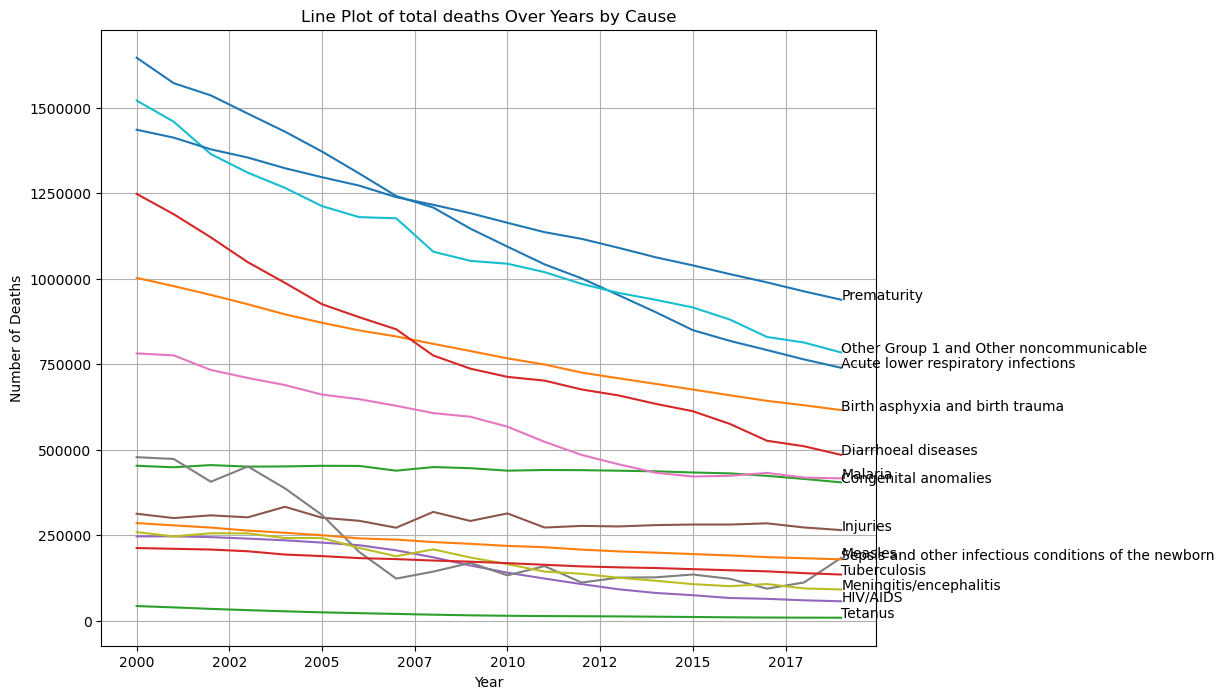

In [32]:
plot_time_series_column_over_deaths('Cause')

There is a consistent decline in the number of deaths for the reasons with highest numbers.

Time series of number of Deaths for each Income group.

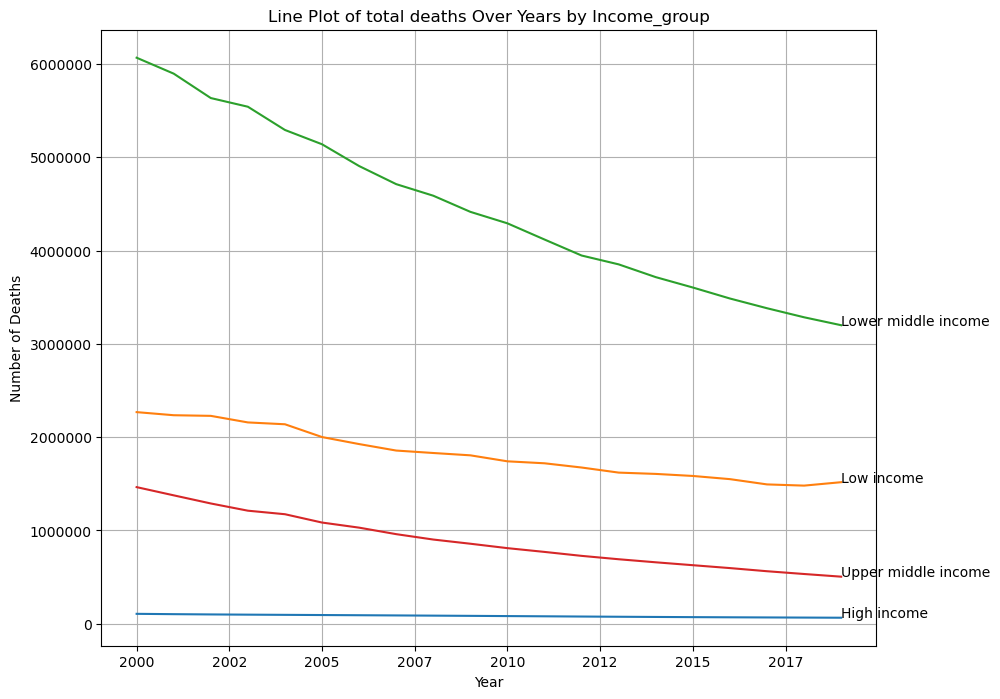

In [33]:
plot_time_series_column_over_deaths('Income_group')

Time series of number of Deaths for each Country.

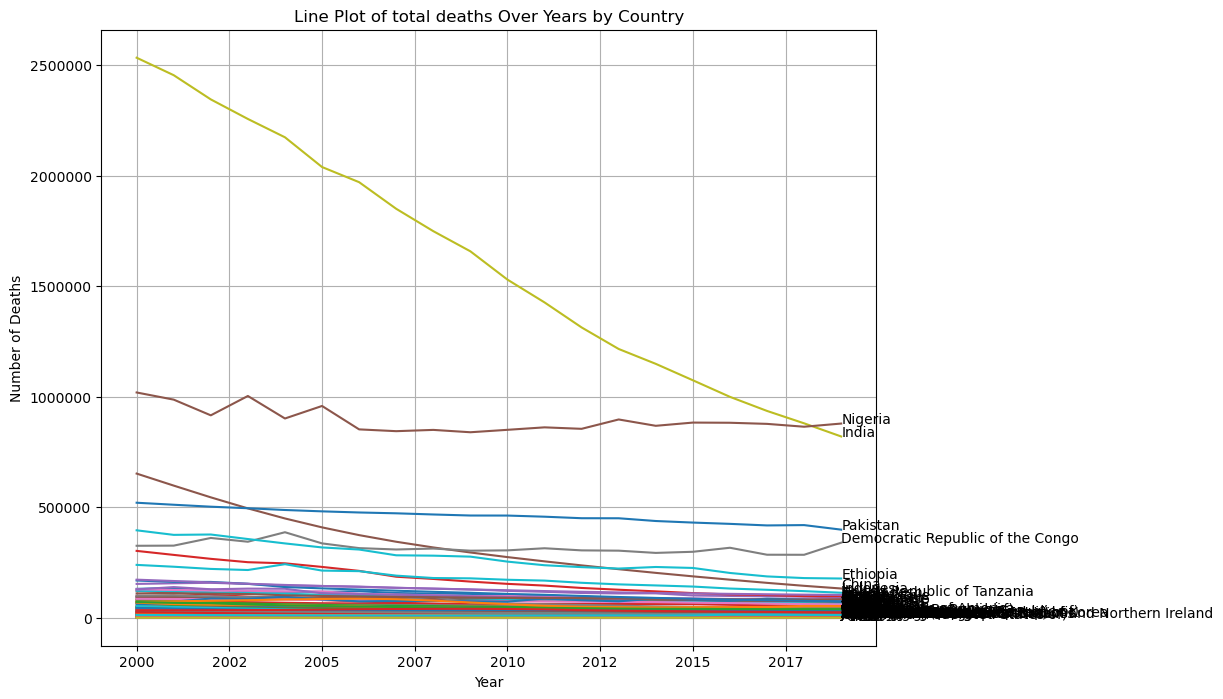

In [34]:
plot_time_series_column_over_deaths('Country')

India seems to an outlier here with the largest numbers maybe due to being highly populated. However, tremendous work has been done towards improving the situation over the 19 years of time period

Global number of deaths for each year:

In [35]:
import locale
# Group the DataFrame by 'Year', calculate the sum of 'Value_Numeric', and sort the result
result = df.groupby('Year')['Value_Numeric'].sum().reset_index()
result = result.sort_values(by='Value_Numeric', ascending=False)

# Set the locale to use comma as a thousands separator
locale.setlocale(locale.LC_ALL, 'en_US')

# Format the 'Value_Numeric' column with commas and round to 2 decimal places
result['Value_Numeric'] = result['Value_Numeric'].apply(lambda x: locale.format_string("%.2f", x, grouping=True))

result


,Year,Value_Numeric
0,2000,"9,917,767.88"
1,2001,"9,621,767.11"
2,2002,"9,263,047.27"
3,2003,"9,019,513.28"
4,2004,"8,710,215.28"
5,2005,"8,328,237.61"
6,2006,"7,962,437.28"
7,2007,"7,626,819.89"
8,2008,"7,416,257.73"
9,2009,"7,171,104.88"


The global numbers of infant mortality have demonstrated a declining trend over the two-decade period from 2000 to 2019. This reduction suggests significant progress in efforts to improve child and infant health on a global scale. It may reflect the impact of various interventions, healthcare advancements, and public health programs aimed at reducing infant mortality rates.

Scope for improvement lies in strengthening healthcare systems, enhancing maternal and child healthcare access, and promoting vaccination and nutrition programs to further reduce global infant mortality.

Finding the cause with the maximum deaths in each year

In [36]:
# Group the data by 'Year' and sum the 'Value Numeric' for each cause
grouped_data = df.groupby(['Year', 'Cause'])['Value_Numeric'].sum().reset_index()

# Find the cause with the maximum deaths in each year
result = grouped_data.groupby('Year')['Value_Numeric'].idxmax()
max_cause_data = grouped_data.loc[result, ['Year', 'Cause','Value_Numeric']].astype({'Value_Numeric': int})

max_cause_data

,Year,Cause,Value_Numeric
0,2000,Acute lower respiratory infections,1645626
14,2001,Acute lower respiratory infections,1571196
28,2002,Acute lower respiratory infections,1535527
42,2003,Acute lower respiratory infections,1482122
56,2004,Acute lower respiratory infections,1429393
70,2005,Acute lower respiratory infections,1371260
84,2006,Acute lower respiratory infections,1307327
98,2007,Acute lower respiratory infections,1241392
122,2008,Prematurity,1215595
136,2009,Prematurity,1191123


 - In the year 2000, the leading cause of under-five deaths was "Acute lower respiratory infections" with 1,645,626 deaths, but it showed a declining trend over the years.

 - "Prematurity" became the leading cause of under-five deaths from the year 2008, and its numbers remained consistently high until 2019, indicating a significant public health concern.

 - These trends suggest the need for targeted interventions and healthcare strategies to address the leading causes of under-five mortality, especially focusing on "Prematurity" in recent years.

Finding the Year with the maximum deaths for each cause

In [37]:
# Group the data by 'Cause' and sum the 'Value Numeric'
grouped_data = df.groupby(['Cause','Year'])['Value_Numeric'].sum().reset_index()

# Find the Year with the maximum deaths for each cause
result = grouped_data.groupby('Cause')['Value_Numeric'].idxmax()
max_year_data = grouped_data.loc[result, ['Cause', 'Year','Value_Numeric']].astype({'Value_Numeric': int})

max_year_data

,Cause,Year,Value_Numeric
0,Acute lower respiratory infections,2000,1645626
20,Birth asphyxia and birth trauma,2000,1001811
42,Congenital anomalies,2002,454530
60,Diarrhoeal diseases,2000,1247508
81,HIV/AIDS,2001,246230
104,Injuries,2004,332585
120,Malaria,2000,781047
140,Measles,2000,477632
160,Meningitis/encephalitis,2000,258584
180,Other Group 1 and Other noncommunicable,2000,1520526


### Geographical Analysis:

Displaying the total number of Deaths for each cuntry over the period of 20 years. Displaying the top top 20 results

In [38]:
# Group the data by 'Cause' and 'Country', calculate the average deaths, and find the country with the highest average for each cause
result = df.groupby(['Country'])['Value_Numeric'].sum().sort_values(ascending=False) #.reset_index()

#result = result.loc[result.groupby('Cause')['Value_Numeric'].idxmax()]
result_df = pd.DataFrame(result)

pd.options.display.float_format = '{:.0f}'.format  # Set the display format for float numbers

result_df.head(20) #[['Cause', 'Country']]

,Value_Numeric
Country,
India,32373165
Nigeria,17885129
Pakistan,9223117
China,6459769
Democratic Republic of the Congo,6363786
Ethiopia,5448532
Indonesia,3548096
Bangladesh,3510311
United Republic of Tanzania,2598824


#### Infant mortality rate:
The infant mortality rate is the number of infant deaths for every 1,000 live births. 

Importing a dataset which has the data of infant mortality rate for each country and ranking of the countries based on this rate.


In [39]:
data_filename = 'Infant_Mortality_Rate.csv'
df_imrate = pd.read_csv(data_filename)
df_imrate.head(10)

,Country,IM_rate,Ranking,Region
0,Afghanistan,103,1,South Asia
1,Somalia,85,2,Africa
2,Central African Republic,82,3,Africa
3,Equatorial Guinea,78,4,Africa
4,Sierra Leone,72,5,Africa
5,Niger,66,6,Africa
6,Chad,64,7,Africa
7,South Sudan,62,8,Africa
8,Mozambique,60,9,Africa
9,Democratic Republic of the Congo,59,10,Africa


Joining the data frames with the number of deaths along with the actual infant mortality rate and world ranking of each country.

In [40]:
# Join the DataFrames on the 'Country' column
result_merged = pd.merge(result_df, df_imrate[['Country', 'IM_rate', 'Ranking']], on='Country', how='left')

# Print the resulting DataFrame
result_merged.head(20)

,Country,Value_Numeric,IM_rate,Ranking
0,India,32373165,30,49
1,Nigeria,17885129,55,14
2,Pakistan,9223117,53,17
3,China,6459769,6,162
4,Democratic Republic of the Congo,6363786,59,10
5,Ethiopia,5448532,32,43
6,Indonesia,3548096,19,81
7,Bangladesh,3510311,30,52
8,United Republic of Tanzania,2598824,30,50
9,Angola,2498657,57,12


Displaying on the top 20 results:

 - __High Total Deaths:__ India has the highest total number of deaths, with approximately 32.4 million deaths, reflecting the country's large population.

 - __Nigeria and Pakistan:__ Nigeria and Pakistan also have a significant number of deaths, with around 17.9 million and 9.2 million deaths, respectively, indicating substantial mortality rates.

 - __Low Infant Mortality Rate (IMR) in China:__ China has a relatively low Infant Mortality Rate (IMR) of 6, which suggests a better healthcare system and lower child mortality compared to the other countries listed.

 - __DRC with High IMR:__ The Democratic Republic of the Congo (DRC) has a high IMR of 59, indicating a relatively high child mortality rate.

 - __Diverse Rankings:__ The ranking column shows the countries' positions concerning IMR. Afghanistan, despite its lower total deaths, has the highest IMR, ranking first. On the other hand, China, with low IMR, is ranked 162nd.

 - __Ethiopia's IMR:__ Ethiopia has a moderate total number of deaths but a relatively high IMR, indicating a need for improvement in child healthcare.

 - __African Countries:__ Several African countries are included in this analysis, and they generally have varying levels of child mortality, with some having high IMRs and rankings.

 - __Data Variation:__ The data highlights a wide variation in child mortality rates and rankings across different countries, emphasizing the need for targeted healthcare interventions to reduce child mortality in regions with higher rates.

Let us see the countries with highest rankings

In [41]:
result_merged.sort_values(by='Ranking', ascending=True).head(20)

,Country,Value_Numeric,IM_rate,Ranking
11,Afghanistan,2055397,103,1
20,Somalia,1591790,85,2
49,Central African Republic,470829,82,3
87,Equatorial Guinea,75591,78,4
34,Sierra Leone,781812,72,5
12,Niger,2045169,66,6
21,Chad,1570557,64,7
35,South Sudan,777622,62,8
13,Mozambique,2037039,60,9
4,Democratic Republic of the Congo,6363786,59,10


 - __Afghanistan and Somalia:__ Afghanistan and Somalia have the highest total number of deaths, which is indicative of significant health challenges in these countries. Afghanistan has the highest total deaths but also the highest IMR, ranking first.

 - __Central African Republic:__ Despite having a relatively lower total number of deaths, the Central African Republic has a high IMR, ranking third. This suggests that child mortality is a significant concern in this country.

 - __Equatorial Guinea:__ Equatorial Guinea has a low total number of deaths but a high IMR, indicating that child mortality remains a concern despite a smaller population.

 - __Sierra Leone:__ Sierra Leone has a high IMR and ranking, suggesting that it faces challenges in child healthcare.

 - __DRC, Mali, and Niger:__ These countries have relatively high total deaths and IMRs, indicating significant child mortality issues.

 - __Angola:__ Angola has a high total number of deaths, and its IMR is also relatively high, making it important to address child healthcare in the country.

 - __Nigeria and Pakistan:__ Both countries have a substantial number of total deaths, high IMRs, and rankings. This emphasizes the need for interventions to reduce child mortality.

 - __Côte d'Ivoire and Burkina Faso:__ These countries have moderate total deaths but relatively high IMRs, indicating challenges in child healthcare.

 - __Data Variability:__ The combined data highlights the wide variation in child mortality rates and rankings across different countries. It's evident that both the total number of deaths and IMR are important indicators to consider when assessing child mortality.

 - __IMR and Ranking Correlation:__ The ranking column corresponds to IMR, with the countries with higher IMRs having lower rankings. Afghanistan has the highest IMR and is ranked first, while Somalia has the second-highest IMR and is ranked second.

These insights underline the need for targeted efforts to improve child healthcare in these countries with high child mortality rates and rankings. Reducing child mortality is a critical global health goal, and these statistics can inform policies and interventions to address this issue.

### Cause-Specific Analysis:

The below code effectively creates a visual representation of the top causes of under-five deaths in 2019, with vaccine-preventable causes highlighted in green.

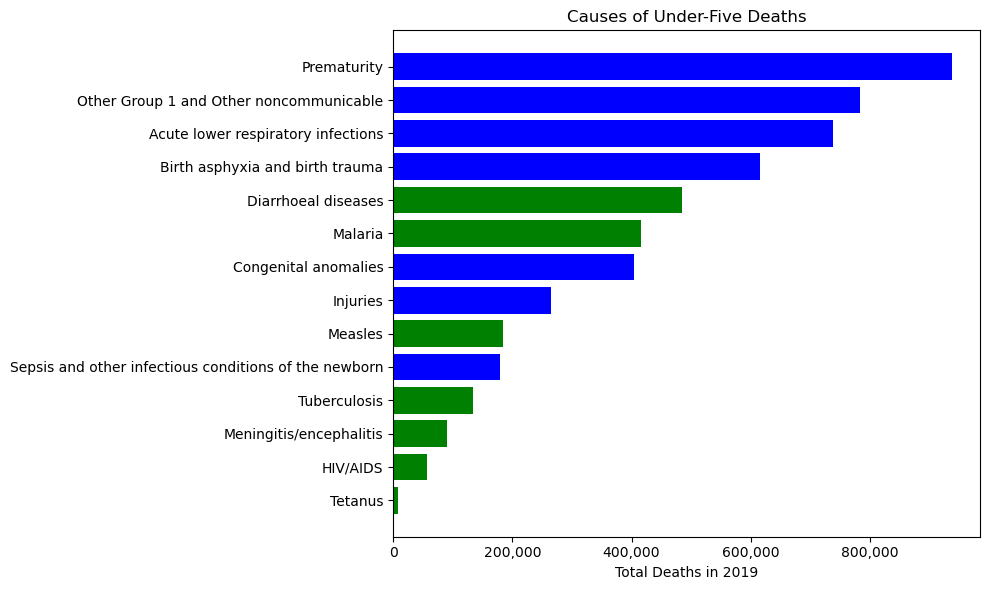

In [42]:

# Let's group the data by 'Cause' and calculate the sum of 'Value_Numeric' for each 'Cause'
cause_data = df[df['Year'] == 2019].groupby('Cause')['Value_Numeric'].sum().sort_values(ascending=True)

# Extract the top N causes for plotting
N = 14  # You can change this value to plot more or fewer causes
top_causes = cause_data.head(N)

vaccine_preventable_causes =['Measles', 'Meningitis/encephalitis', 'Tuberculosis', 'Tetanus', 'HIV/AIDS', 'Malaria', 'Diarrhoeal diseases']

# Define the colors for all bars
bar_colors = ['blue' if cause not in vaccine_preventable_causes else 'green' for cause in top_causes.index]

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
positions = np.arange(len(top_causes))
ax.barh(positions, top_causes, color= bar_colors)

# Set y-tick labels to display the causes
ax.set_yticks(positions)
ax.set_yticklabels(top_causes.index)

# Set labels and title
ax.set_xlabel('Total Deaths in 2019')
ax.set_title('Causes of Under-Five Deaths')

# Change the x-axis tick labels to whole numbers
ax.set_xticklabels([f'{int(x):,}' for x in ax.get_xticks()])


plt.tight_layout()
plt.show()

 - Among all the causes listed, the vaccine-preventable diseases are Measles, Meningitis/encephalitis, Tuberculosis, Tetanus.
 - HIV?AIDS can be prevented with medication during pregnancy.
 - Malaria and diarrheal diseases can be prevented through safe drinking-water and adequate sanitation and hygiene.
 - Other genetic or developmental causes like Congenital anomalies, Birth Asphyxia, Prematurity etc can be prevented by early detection and treatment.

The below code displays the top 5 countries with the highest average Deaths for each cause, with separate columns for each country, making it easier to analyze and visualize the data.

In [43]:
# Group by Cause, Year, and Country, calculate the average Value_Numeric, and unstack
result = df.groupby(['Cause', 'Country'])['Value_Numeric'].mean().unstack()

# Find the top 5 countries with the highest average for each cause
top_10_countries = result.apply(lambda x: x.nlargest(10).index.tolist(), axis=1)

# Create a new DataFrame with the results
result_df = top_10_countries.reset_index()
result_df.columns.name = None  # Remove column name

# Split the '0' column into five separate columns
result_df[['Country 1', 'Country 2', 'Country 3', 'Country 4', 'Country 5','Country 6', 'Country 7', 'Country 8', 'Country 9', 'Country 10']] = result_df[0].apply(lambda x: pd.Series(x))

# Drop the original '0' column
result_df = result_df.drop(0, axis=1)

result_df

,Cause,Country 1,Country 2,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10
0,Acute lower respiratory infections,India,Nigeria,Pakistan,Ethiopia,Democratic Republic of the Congo,China,Bangladesh,Angola,United Republic of Tanzania,Afghanistan
1,Birth asphyxia and birth trauma,India,Pakistan,Nigeria,China,Ethiopia,Bangladesh,Democratic Republic of the Congo,Indonesia,United Republic of Tanzania,Afghanistan
2,Congenital anomalies,India,China,Pakistan,Indonesia,Brazil,Nigeria,Egypt,Mexico,Bangladesh,Philippines
3,Diarrhoeal diseases,Nigeria,India,Pakistan,Ethiopia,Democratic Republic of the Congo,Angola,Niger,Indonesia,Bangladesh,United Republic of Tanzania
4,HIV/AIDS,South Africa,Nigeria,Uganda,Zimbabwe,United Republic of Tanzania,Kenya,Malawi,Mozambique,Ethiopia,India
5,Injuries,India,China,Nigeria,Pakistan,Bangladesh,Indonesia,Democratic Republic of the Congo,Ethiopia,United Republic of Tanzania,Afghanistan
6,Malaria,Nigeria,Democratic Republic of the Congo,Burkina Faso,Mozambique,Côte d'Ivoire,Uganda,Niger,Mali,United Republic of Tanzania,Angola
7,Measles,India,Nigeria,Democratic Republic of the Congo,Ethiopia,Somalia,Indonesia,Bangladesh,Burkina Faso,Chad,Niger
8,Meningitis/encephalitis,India,Nigeria,Pakistan,Democratic Republic of the Congo,Ethiopia,Niger,Indonesia,China,United Republic of Tanzania,Bangladesh
9,Other Group 1 and Other noncommunicable,India,Nigeria,Pakistan,Ethiopia,China,Democratic Republic of the Congo,Indonesia,Afghanistan,Angola,Bangladesh


It's essential to note that while analyzing these averages is informative, it's also crucial to consider the total numbers of deaths for each country. Policies and interventions should take into account both the average death rates and the total numbers because large countries may have higher death counts even if their infant mortality rates (IMRs) are relatively lower. Policymakers need to develop strategies that cater to the entire population, whether the country is small or large, to address the overall burden of child mortality effectively.

The below code generates a line plot that visualizes the rate of change in deaths over the years for various causes. It helps in understanding the trends and fluctuations in mortality rates for each cause over time.

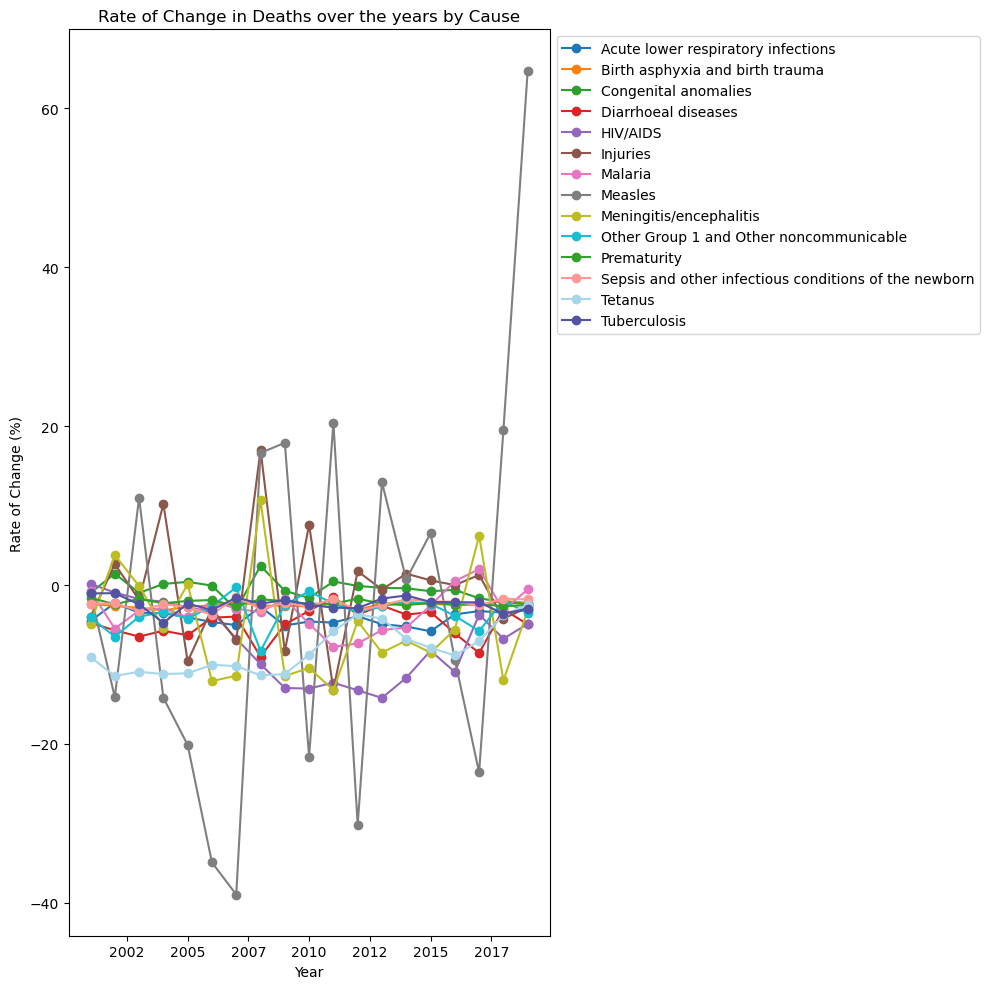

In [46]:

# Group the data by 'Cause' and 'Year' and sum the 'Value_Numeric'
summed_data = df.groupby(['Cause', 'Year'])['Value_Numeric'].agg('sum').reset_index()

# Sort the DataFrame by 'Cause' and 'Year' for consistency
summed_data = summed_data.sort_values(by=['Cause', 'Year'])

# Calculate the rate of change for 'Value_Numeric' for each cause
summed_data['Rate_of_Change'] = summed_data.groupby('Cause')['Value_Numeric'].pct_change() * 100

#print(summed_data[summed_data['Cause']=='Tuberculosis'])

# Drop the first row for each cause (as it will have a NaN rate of change)
summed_data = summed_data.dropna(subset=['Rate_of_Change'])

# Reset the index for clarity
summed_data = summed_data.reset_index(drop=True)

# Generate a list of distinct colors for each cause
unique_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#33a02c','#ff9896','#a7d5ea','#5254a3']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate through each 'Cause' and plot the rate of change with a unique color
for key, grp, color in zip(summed_data['Cause'].unique(), summed_data.groupby('Cause'), unique_colors):
    ax.plot(grp[1]['Year'], grp[1]['Rate_of_Change'], label=key, color=color, marker='o')

# Set labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Rate of Change (%)')
ax.set_title('Rate of Change in Deaths over the years by Cause')

# Add a legend inside the graph
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Format the x-axis ticks with no decimals
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: int(x)))

# Show the plot
plt.tight_layout()
plt.show()


 - Very inconsistent and sometimes positive rate of change with the Measles, Meningitis/encephalitis which is not pleasing and effective steps need to be taken for a better change.
 - Prematurity has a consistently positive rate of change which need needs the most priority

## Interactive Visualizations

This code displays a bar plot of total deaths based on the selected cause and year from the dropdowns provided. It handles different cases such as showing data for all causes and years, filtering by cause, year, or both, and limiting the display to the top 20 countries. 

In [47]:
import ipywidgets as widgets
from ipywidgets import interact, Layout
import numpy as np


# Sort the DataFrame by 'Year' for consistency
df = df.sort_values(by=['Year', 'Value_Numeric'], ascending=[True, False])

# Create a dropdown widget for selecting 'Cause'
cause_dropdown = widgets.Dropdown(
    options=['All'] + df['Cause'].unique().tolist(),
    value='All',
    description='Cause:'
)

# Create a dropdown widget for selecting 'Year'
year_dropdown = widgets.Dropdown(
    options=['All'] + df['Year'].unique().tolist(),
    value='All',
    description='Year:'
)

# Create a function to update the plot based on dropdown selections
@interact(cause=cause_dropdown, year=year_dropdown)
def plot_graph(cause, year):
    plt.figure(figsize=(14, 6))
    
    if cause == 'All' and year == 'All':
        data_to_plot = df  # Show all data
        title = 'Total Deaths for All Causes and Years'
    elif cause == 'All':
        data_to_plot = df[df['Year'] == year]  # Filter by year
        title = f'Total Deaths for All Causes in {year}'
    elif year == 'All':
        data_to_plot = df[df['Cause'] == cause]  # Filter by cause
        title = f'Total Deaths for {cause} in All Years'
    else:
        data_to_plot = df[(df['Cause'] == cause) & (df['Year'] == year)]  # Filter by both cause and year
        title = f'Total Deaths for {cause} in {year}'
        
        # Show only the top 20 countries
    data_to_plot = data_to_plot.head(20)

    plt.bar(data_to_plot['Country'], data_to_plot['Value_Numeric'])
    plt.xticks(rotation=90)
    plt.xlabel('Country')
    plt.ylabel('Total Deaths')
    plt.title(title)
    plt.show()
    


interactive(children=(Dropdown(description='Cause:', options=('All', 'Other Group 1 and Other noncommunicable'…

The below code creates an interactive data visualization tool using dropdown selections to explore and display under-five deaths data. Users can select whether they want to view data by 'Country,' 'Region,' or 'Global,' choose a specific year, and, for 'Country' and 'Region' selections, pick a specific country or region. The tool generates pie charts and world maps to display the data based on the user's selections, providing a dynamic way to explore and understand under-five deaths data across different categories and years.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import ipywidgets as widgets
from ipywidgets import interact

# Sample data (replace with your dataset)
# ...

# Create a function to update the data based on user selection
def update_data(data_selector):
    if data_selector == "Country":
        options = df["Country"].unique()
        return options
    elif data_selector == "Region":
        options = df["Region"].unique()
        return options
    elif data_selector == "Global":
        options = df["Year"].unique()
        return options

# Create a function to display pie chart and world map
def display_pie_chart_and_map(data_selector, year_selector, selected_data):
    if data_selector == "Country":
        country_selector = widgets.Dropdown(
            options=update_data(data_selector),
            description="Select Country:"
        )
        country_selector.disabled = False
        display(country_selector)

        def display_country_pie_chart(change):
            selected_country = change.new
            country_data = selected_data[selected_data["Country"] == selected_country]
            grouped_data = country_data.groupby("Cause")["Value_Numeric"].sum().reset_index()
            fig = px.pie(grouped_data, values="Value_Numeric", names="Cause", title=f"Under-Five Deaths in {selected_country} ({year_selector})")
            fig.show()

        country_selector.observe(display_country_pie_chart, names="value")
    elif data_selector == "Region":
        region_selector = widgets.Dropdown(
            options=update_data(data_selector),
            description="Select Region:"
        )
        region_selector.disabled = False
        display(region_selector)

        def display_region_pie_chart_and_map(change):
            selected_region = change.new
            region_data = selected_data[selected_data["Region"] == selected_region]

            grouped_data = region_data.groupby("Cause")["Value_Numeric"].sum().reset_index()
            fig = px.pie(grouped_data, values="Value_Numeric", names="Cause", title=f"Under-Five Deaths in {selected_region} ({year_selector})")
            fig.show()
            
            region_map = region_data.groupby("Country")["Value_Numeric"].sum().reset_index()
            region_map["text"] = region_map["Country"] + "<br>Value_Numeric: " + region_map["Value_Numeric"].astype(str)
            geo_data = go.Figure(data=go.Choropleth(
                locations=region_map["Country"],
                z=region_map["Value_Numeric"],
                locationmode='country names',
                colorscale='Viridis',
                text=region_map["text"],
            ))
            geo_data.update_geos(
                showcoastlines=True
            )
            geo_data.show()

        region_selector.observe(display_region_pie_chart_and_map, names="value")
    elif data_selector == "Global":
        grouped_data = selected_data.groupby("Cause")["Value_Numeric"].sum().reset_index()
        fig = px.pie(grouped_data, values="Value_Numeric", names="Cause", title=f"Global Under-Five Deaths ({year_selector})")
        fig.show()
        
        global_map = selected_data.groupby("Country")["Value_Numeric"].sum().reset_index()
        global_map["text"] = global_map["Country"] + "<br>Value_Numeric: " + global_map["Value_Numeric"].astype(str)
        geo_data = go.Figure(data=go.Choropleth(
            locations=global_map["Country"],
            z=global_map["Value_Numeric"],
            locationmode='country names',
            colorscale='Viridis',
            text=global_map["text"],
        ))
        geo_data.update_geos(
            showcoastlines=True
        )
        geo_data.show()

# Create a function to handle selection changes
def handle_change(change):
    if data_selector.value == "Country":
        country_selector.options = update_data(data_selector.value)
        country_selector.disabled = False
    elif data_selector.value == "Region":
        region_selector.options = update_data(data_selector.value)
        region_selector.disabled = False
    else:
        country_selector.disabled = True
        region_selector.disabled = True
        country_selector.value = None
        region_selector.value = None

# Dropdown for selecting Data type (Country, Region, Global)
data_selector = widgets.Dropdown(
    options=["Country", "Region", "Global"],
    description="Select Data:",
    value="Country"
)

# Dropdown for selecting Year
year_selector = widgets.Dropdown(
    options=df["Year"].unique(),
    description="Select Year:"
)

# Dropdown for selecting Country
country_selector = widgets.Dropdown(
    options=update_data(data_selector.value),
    description="Select Country:"
)
country_selector.disabled = False

# Dropdown for selecting Region
region_selector = widgets.Dropdown(
    options=update_data(data_selector.value),
    description="Select Region:"
)
region_selector.disabled = True

# Link selection changes to the handler
data_selector.observe(handle_change, names="value")

# Interactive display
interact(display_pie_chart_and_map, data_selector=data_selector, year_selector=year_selector, selected_data=widgets.fixed(df))


interactive(children=(Dropdown(description='Select Data:', options=('Country', 'Region', 'Global'), value='Cou…

<function __main__.display_pie_chart_and_map(data_selector, year_selector, selected_data)>

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

 # <h1 style='background:#F7B2B0; border:0; color:black'><center>FETAL HEALTH</center></h1> 
 

 
Cardiotocography (CTG) is used during pregnancy to monitor fetal heart rate and uterine contractions. It is monitor fetal well-being and allows early detection of fetal distress. 

 CTG interpretation helps in determining if the pregnancy is high or low risk.  An abnormal CTG may indicate the need for further investigations and potential intervention.

In this project, I will develop a multiclass classification model for CTG features to accurately categorize fetal health into Normal, Suspect, and Pathological states, aiming to aid healthcare professionals in reducing child and maternal mortality.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
np.random.seed(0)

###                                                                     Data
This dataset contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. Normal
2. Suspect
3. Pathological


In [52]:
data = pd.read_csv("fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0,0,0,0,0,0,73,0,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0,0,0,0,0,0,17,2,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0,0,0,0,0,0,16,2,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0,0,0,0,0,0,16,2,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0,0,0,0,0,0,16,2,0,...,53,170,9,0,137,136,138,11,1,1


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

**On This Dataset**
**Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

**Features**

* **'baseline value'** FHR baseline (beats per minute)
* **'accelerations'** Number of accelerations per second
* **'fetal_movement'** Number of fetal movements per second
* **'uterine_contractions'** Number of uterine contractions per second
* **'light_decelerations'** Number of light decelerations per second
* **'severe_decelerations'** Number of severe decelerations per second
* **'prolongued_decelerations'** Number of prolonged decelerations per second
* **'abnormal_short_term_variability'** Percentage of time with abnormal short term variability
* **'mean_value_of_short_term_variability'** Mean value of short term variability
* **'percentage_of_time_with_abnormal_long_term_variability'** Percentage of time with abnormal long term variability
* **'mean_value_of_long_term_variability'** Mean value of long term variability 
* **'histogram_width'** Width of FHR histogram
* **'histogram_min' Minimum** (low frequency) of FHR histogram
* **'histogram_max' Maximum** (high frequency) of FHR histogram
* **'histogram_number_of_peaks'** Number of histogram peaks
* **'histogram_number_of_zeroes'** Number of histogram zeros
* **'histogram_mode'** Histogram mode
* **'histogram_mean'** Histogram mean
* **'histogram_median'** Histogram median
* **'histogram_variance'** Histogram variance
* **'histogram_tendency'** Histogram tendency

* **Target**
* **'fetal_health'** Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

#### Summary Statistics

In [54]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126,...,2126,2126,2126,2126,2126,2126,2126,2126,2126,2126
mean,133,0,0,0,0,0,0,47,1,10,...,94,164,4,0,137,135,138,19,0,1
std,10,0,0,0,0,0,0,17,1,18,...,30,18,3,1,16,16,14,29,1,1
min,106,0,0,0,0,0,0,12,0,0,...,50,122,0,0,60,73,77,0,-1,1
25%,126,0,0,0,0,0,0,32,1,0,...,67,152,2,0,129,125,129,2,0,1
50%,133,0,0,0,0,0,0,49,1,0,...,93,162,3,0,139,136,139,7,0,1
75%,140,0,0,0,0,0,0,61,2,11,...,120,174,6,0,148,145,148,24,1,1
max,160,0,0,0,0,0,0,87,7,91,...,159,238,18,10,187,182,186,269,1,3


#### Distribution of data for each feature.

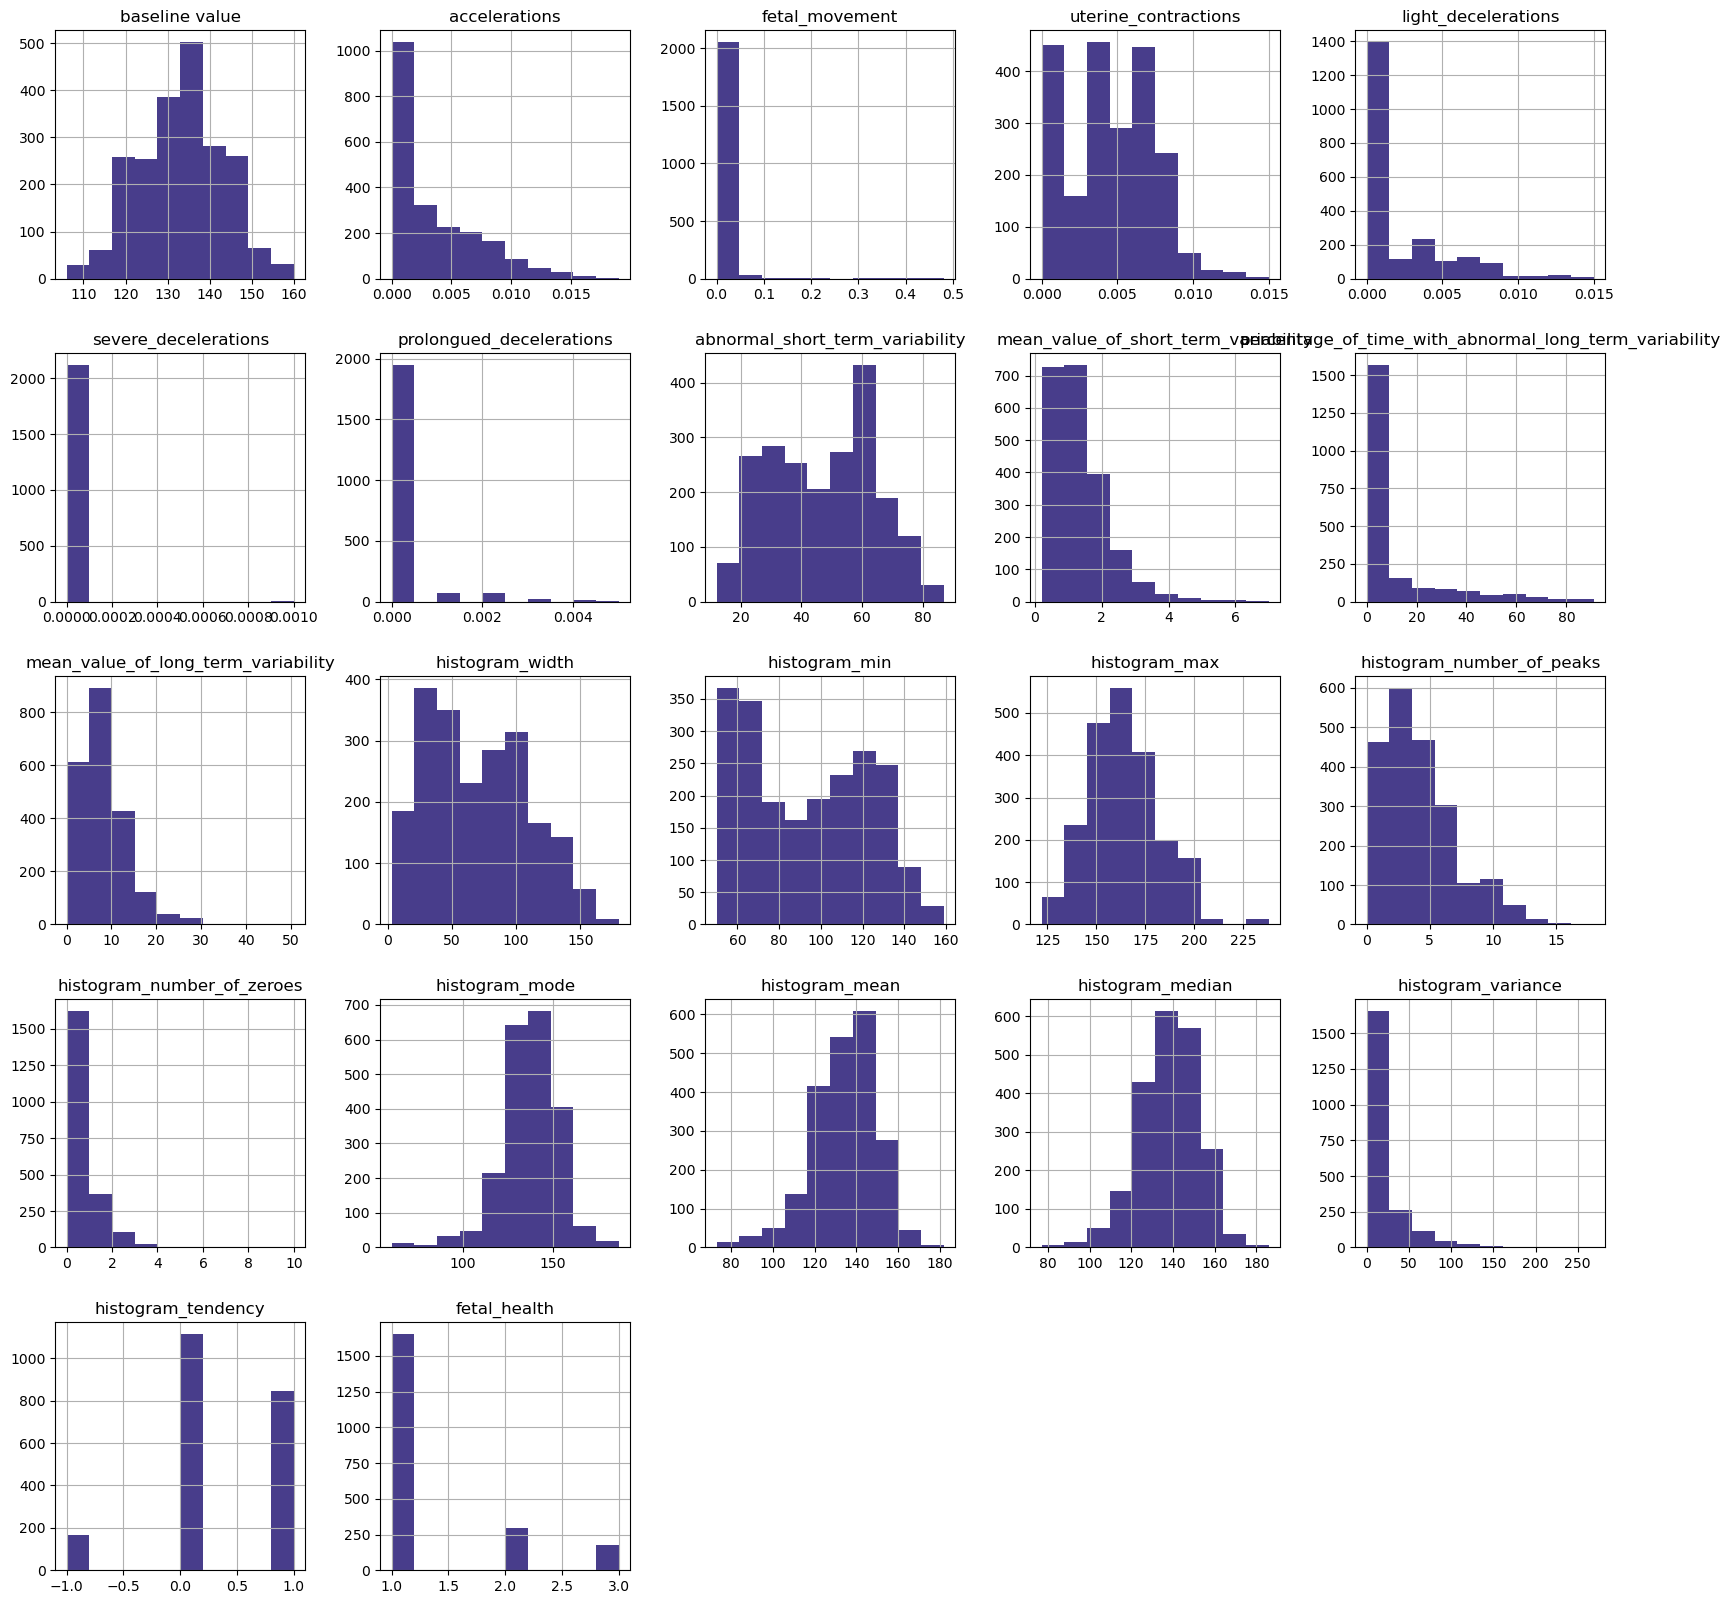

In [55]:
# Evaluating distributions of the features 
hist_plot = data.hist(figsize = (20,20), color = "#483D8B")

In [56]:
data['fetal_health'].value_counts()

1    1655
2     295
3     176
Name: fetal_health, dtype: int64

The value counts of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy. 



Let us evaluate the correlation matrix.

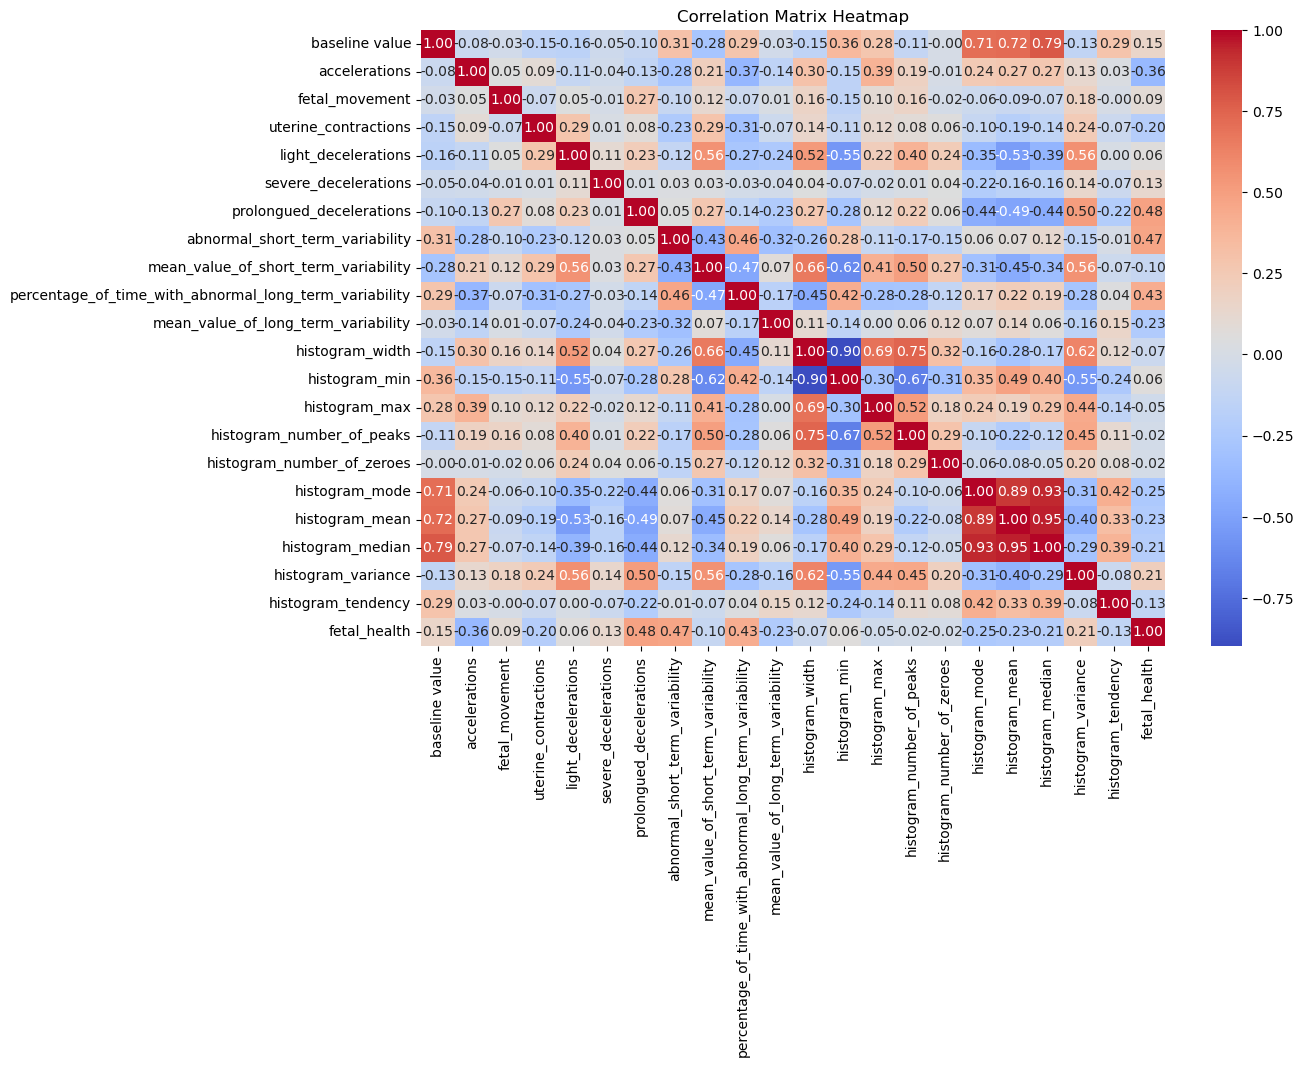

In [57]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


 - __Features positively correlated with "fetal_health" (correlation coefficient > 0):__

	 - Features such as "baseline value," "abnormal_short_term_variability," "percentage_of_time_with_abnormal_long_term_variability," and "histogram_tendency" have positive correlations with "fetal_health."


 - __Features negatively correlated with "fetal_health" (correlation coefficient < 0):__

	 - Features like "accelerations," "fetal_movement," "uterine_contractions," "light_decelerations," "severe_decelerations," and "prolongued_decelerations" have negative correlations with "fetal_health."

Plotting pair plots for strongly correlated features with seperating the fetal Health with different colors.

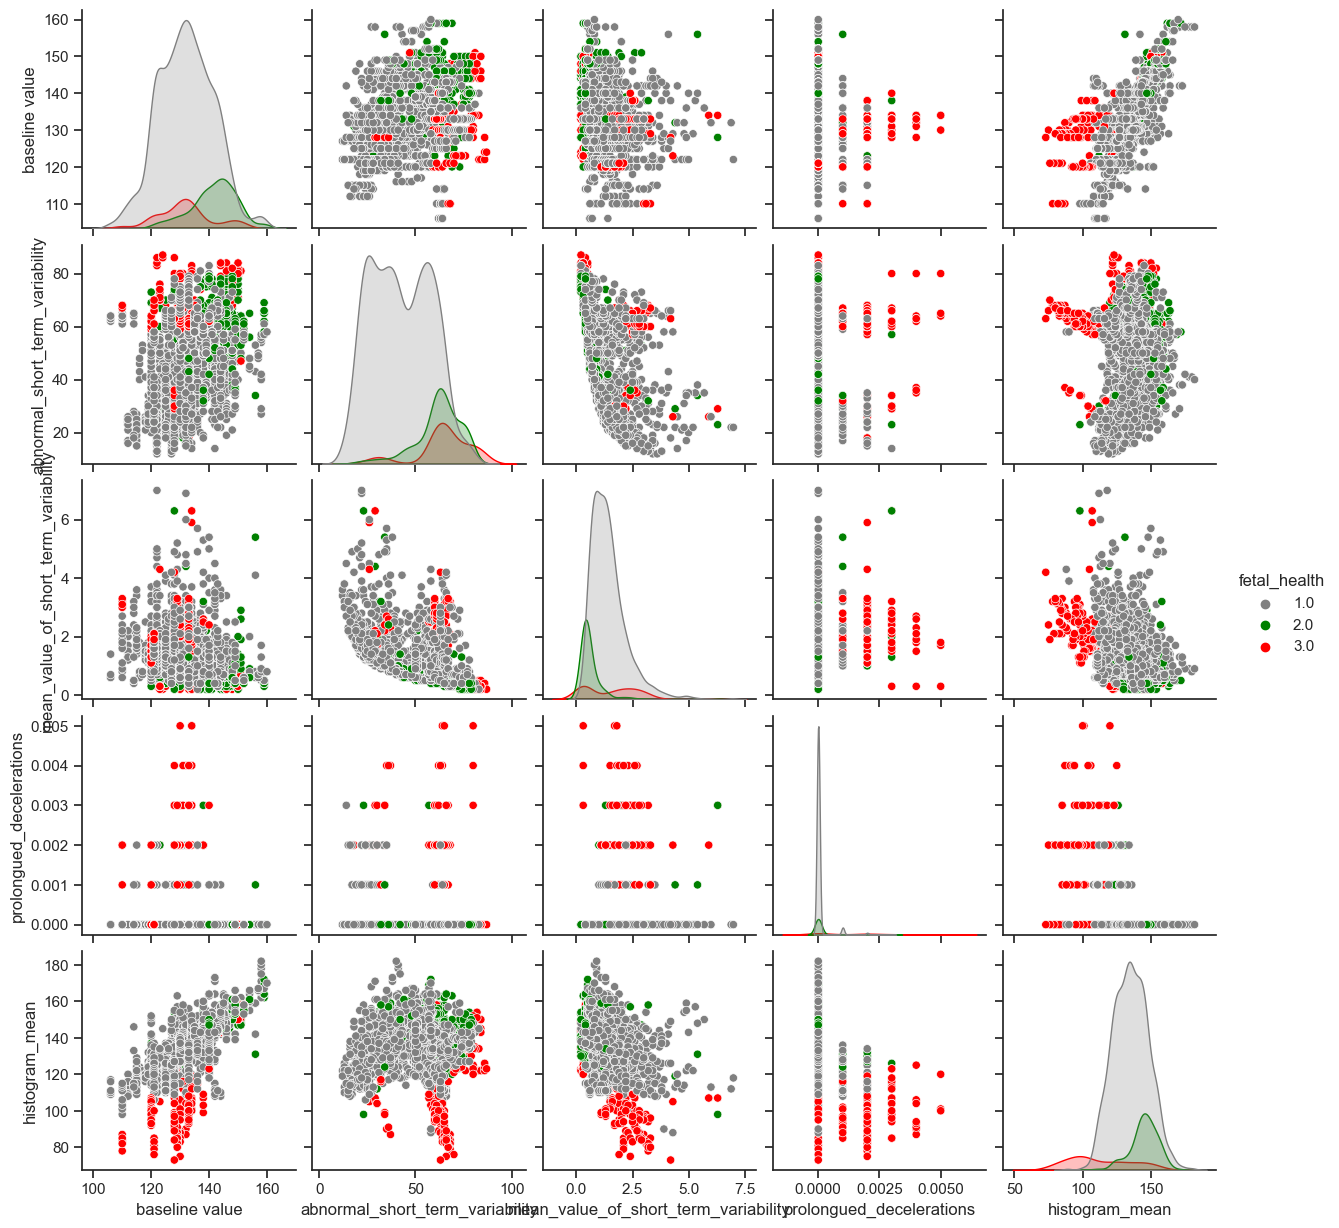

In [58]:
selected_columns = ['baseline value', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability','prolongued_decelerations', 'histogram_mean', 'fetal_health']

# Create a DataFrame with the selected columns
subset_data = data[selected_columns]

# Define a custom color palette for each fetal_health category
custom_palette = {1: 'grey', 2: 'green', 3: 'red'}

# Create a pairplot with 'hue' as 'fetal_health'
sns.set(style="ticks")
sns.pairplot(subset_data, hue="fetal_health", palette=custom_palette)
plt.show()

No significant classification is visible. However, the fetal health seems to be Pathological(3) for lower Histogram means. Thus, Histogram_mean seems to be an import feature for model building.

## MODEL SELECTION AND BUILDING

In this section we will:
* Set up features(X) and target(Y)
* Scale the features
* Split training and test sets 
* Model selection
* Hyperparameter tuning

In [59]:
#assigning values to features as X and target as y
X=data.drop(["fetal_health"],axis=1)
y=data["fetal_health"]

#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   

In [60]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [61]:
#A quick model selection process
#pipelines of models( it is short was to fit and pred)
pipeline_lr=Pipeline([('lr_classifier',LogisticRegression(random_state=42))])

pipeline_dt=Pipeline([ ('dt_classifier',DecisionTreeClassifier(random_state=42))])

pipeline_rf=Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_svc=Pipeline([('sv_classifier',SVC())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_svc, pipeline_gbcl]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: "SVC",4:"gbcl_classifier"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#cross validation on accuracy 
cv_results_accuracy = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train, cv=10 )
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

Logistic Regression: 0.897170 
Decision Tree: 0.916683 
RandomForest: 0.940876 
SVC: 0.906594 
gbcl_classifier: 0.939543 



__Logistic Regression (Accuracy: 0.897170):__

Logistic Regression achieved an accuracy of approximately 0.897, which means it correctly classified about 89.7% of the data.
It is a relatively simple model, and its performance can serve as a baseline for more complex models.

__Decision Tree (Accuracy: 0.916683):__

The Decision Tree model outperformed Logistic Regression with an accuracy of approximately 0.917.
Decision Trees are known for their interpretability, and this model shows improved predictive power compared to Logistic Regression.

__Random Forest (Accuracy: 0.940876):__

Random Forest achieved an even higher accuracy of approximately 0.941.
Random Forest is an ensemble method that combines multiple Decision Trees. Its accuracy suggests improved generalization and predictive capabilities.

__Support Vector Classifier (SVC) (Accuracy: 0.906594):__

The Support Vector Classifier achieved an accuracy of approximately 0.907.
SVC is effective at finding the hyperplane that best separates classes in high-dimensional spaces, but it might be slightly less accurate than the Random Forest in this case.

__Gradient Boosting Classifier (Accuracy: 0.939543):__

The Gradient Boosting Classifier (gbcl_classifier) performed exceptionally well with an accuracy of approximately 0.940.
Gradient Boosting is an ensemble method that sequentially builds weak learners to create a strong classifier. It often yields high accuracy.

In summary, the Random Forest and Gradient Boosting Classifier models are the top performers, achieving accuracies above 0.94.

Let's find out how Random forest performs on testset

In [62]:
#taking look at the test set
pred_rfc = pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9435736677115988


### Hyper Parameter Tuning for Random Forest

In [63]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV
parameters = { 
    'n_estimators': [100,150, 200,500,700,900],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,8,12,14,16],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv= 5)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'auto',
 'n_estimators': 100,
 'n_jobs': 1}

In [64]:
RF_model = RandomForestClassifier(**CV_rfc.best_params_)
RF_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=RF_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.9498432601880877

The performance measures that would provide better insight:
* Confusion Matrix
* Precision
* Recall
* F1 Score 

In [65]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.96      0.99      0.97       496
         2.0       0.92      0.78      0.84       101
         3.0       0.90      0.93      0.92        41

    accuracy                           0.95       638
   macro avg       0.93      0.90      0.91       638
weighted avg       0.95      0.95      0.95       638



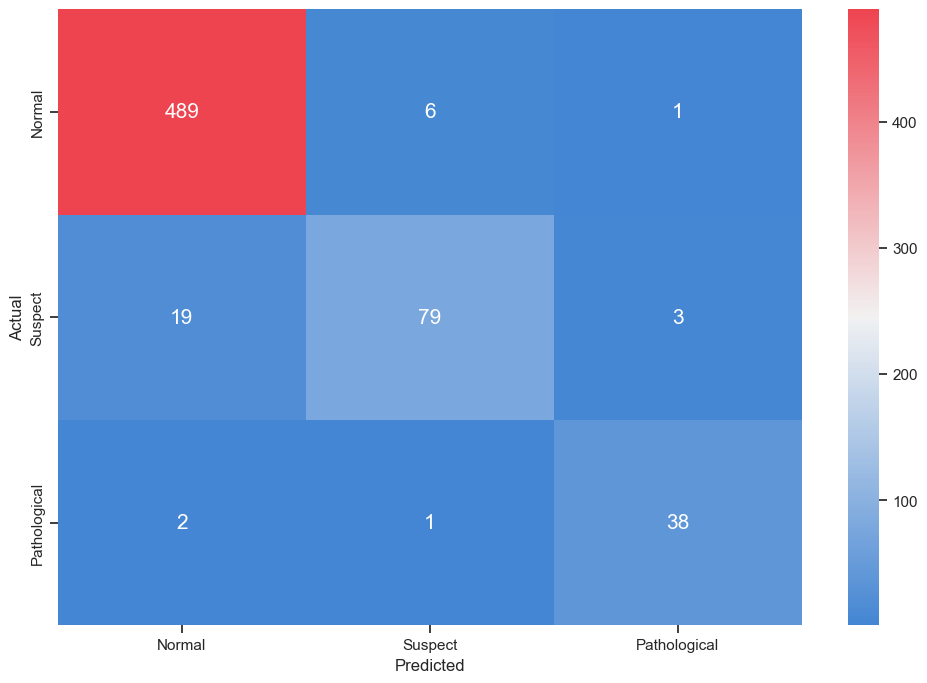

In [66]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)

# Define class labels
class_labels = ["Normal", "Suspect", "Pathological"]

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
sns.heatmap(cf_matrix, cmap=cmap,annot = True, fmt='d', annot_kws = {'size':15})

# Set axis labels
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the class labels as tick labels
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

plt.show()

### Random Forest:

__Precision:__

Class 1 (1.0): Precision of 0.96, indicating that 96% of the samples predicted as class 1 were correct.

Class 2 (2.0): Precision of 0.92, suggesting that 92% of the samples predicted as class 2 were correct.

Class 3 (3.0): Precision of 0.90, indicating 90% accuracy for class 3 predictions.

__Recall:__

Class 1: Recall of 0.99, meaning that 99% of the actual class 1 samples were correctly identified.

Class 2: Recall of 0.78, indicating that 78% of actual class 2 samples were correctly classified.

Class 3: Recall of 0.93, suggesting 93% recall for class 3.

__F1-Score:__ The F1-score combines precision and recall into a single metric. Class 1 has an F1-score of 0.97, class 2 has an F1-score of 0.84, and class 3 has an F1-score of 0.92.

__Support:__ The number of samples in each class.

Let's find out how Gradient Boost performs on testset

In [72]:
pred_rfc = pipeline_gbcl.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9545454545454546


### Hyper Parameter Tuning for Gradient Boost

In [67]:
parameters = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 
              "n_estimators": [200, 350, 500, 750],
              "max_depth": [3, 6, 8]
              }
GridSearchCV_gbcl = GridSearchCV(estimator=GradientBoostingClassifier(), 
                                param_grid=parameters, 
                                cv=2,
                                verbose=1, 
                                n_jobs=3,
                                scoring="accuracy", 
                                return_train_score=True
                                )
GridSearchCV_gbcl.fit(X_train, y_train)


Fitting 2 folds for each of 84 candidates, totalling 168 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=3,
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'loss': ['deviance'], 'max_depth': [3, 6, 8],
                         'n_estimators': [200, 350, 500, 750]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [68]:
best_parameters = GridSearchCV_gbcl.best_params_
best_parameters

{'learning_rate': 0.5, 'loss': 'deviance', 'max_depth': 3, 'n_estimators': 500}

In [69]:
GB_model = GradientBoostingClassifier(**best_parameters)
GB_model.fit(X_train, y_train)
#Testing the Model on test set
predictions=GB_model.predict(X_test)
acccuracy= accuracy_score(y_test,predictions)
acccuracy

0.957680250783699

In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       496
         2.0       0.92      0.88      0.90       101
         3.0       0.86      0.93      0.89        41

    accuracy                           0.96       638
   macro avg       0.92      0.93      0.92       638
weighted avg       0.96      0.96      0.96       638



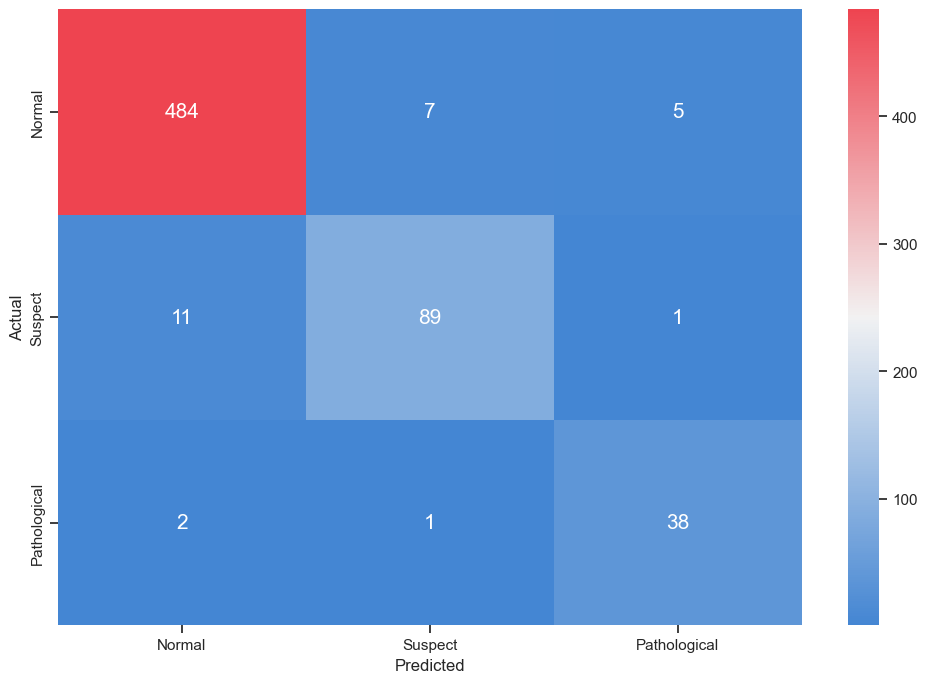

In [71]:
# cofusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, cmap=cmap,annot = True, fmt='d', annot_kws = {'size':15})

# Set axis labels
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Set the class labels as tick labels
plt.xticks(np.arange(len(class_labels)) + 0.5, class_labels)
plt.yticks(np.arange(len(class_labels)) + 0.5, class_labels)

plt.show()

### Gradient Boosting:

__Precision:__

Class 1: Precision of 0.97, indicating 97% accuracy for class 1 predictions.

Class 2: Precision of 0.92, suggesting that 92% of class 2 predictions were correct.

Class 3: Precision of 0.86, implying 86% accuracy for class 3.

__Recall:__

Class 1: Recall of 0.98, meaning that 98% of actual class 1 samples were correctly identified.

Class 2: Recall of 0.88, indicating 88% recall for class 2.

Class 3: Recall of 0.93, suggesting 93% recall for class 3.

__F1-Score:__ The F1-score for class 1 is 0.97, class 2 is 0.90, and class 3 is 0.89.

__Support:__ The number of samples in each class.

 - Both models perform well with high accuracy, indicating their effectiveness in making accurate predictions.
 - Random Forest has slightly lower precision for class 2, while Gradient Boosting has lower precision for class 3.
 - Random Forest has lower recall for class 2, indicating that it misses some actual class 2 samples.
 - Gradient Boosting has lower recall for class 2 and higher recall for class 3.
 - The weighted average F1-scores for both models are high, indicating a balance between precision and recall.
 - Gradient Boosting shows better recall for class 2 but slightly lower precision for class 3 compared to Random Forest.

However, predicting fetal health would require a better recall. Thus, Gradient Boost Classifier wins.

## Conclusions

__Machine Learning:__ The Gradient boost classifier model can be deployed into the Healthcare system where the Cardiotocogram readings are monitored. Suspected and Pathological fetal health can be sent for further diagnosis and necessary preventive steps to take.
    
__Policy changes:__ Vaccination is an effective way to prevent these diseases, and in many countries, vaccination and region specific strategies are in place to protect children from vaccine-preventable and other illnesses.

__Next steps__: Research and Develop a system for continuous monitoring of fetal health throughout pregnancy, which can alert healthcare providers to potential issues.